# EDA 프로젝트

## Mission 2 : 한국 남녀 임금 격차 데이터 분석

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. 분석의 목적과 변수 확인

### 분석 목적 : 대한민국의 성별 임금 격차에 대한 요인 확인
### 정말 성별이 남녀 임금격차에 가장 큰 요인일까?
#### 변수 : 성별, 나이, 업종, 근로시간에 따른 연봉

In [11]:
salary_data = pd.read_csv('./2019_korea_salary_data.csv', thousands = ',')
salary_data.fillna(method = 'ffill')
salary_data.head(10)

,jobs,gender,salary,age,number of workers,working hours
0,NaN,NaN,NaN,NaN,NaN,NaN
1,all,all,all,all,10846459.0,163.6
2,all,all,all,~ 19,39078.0,148.0
3,all,all,all,20 ~ 24,471259.0,160.9
4,all,all,all,25 ~ 29,1316411.0,164.3
5,all,all,all,30 ~ 34,1364259.0,164.5
6,all,all,all,35 ~ 39,1543573.0,164.8
7,all,all,all,40 ~ 44,1384689.0,164.5
8,all,all,all,45 ~ 49,1452996.0,164.7
9,all,all,all,50 ~ 54,1257121.0,164.9


In [12]:
## 각 coloum의 데이터 타입 확인하기

salary_data.dtypes

jobs                  object
gender                object
salary                object
age                   object
number of workers    float64
working hours        float64
dtype: object

## 2. 데이터 전체적으로 살펴보기

In [13]:
salary_data.describe()

,number of workers,working hours
count,8.250000e+03,8250.000000
mean,2.103556e+04,134.282630
std,1.767657e+05,57.161367
min,0.000000e+00,0.000000
25%,1.122500e+02,107.525000
50%,1.066000e+03,157.000000
75%,6.419750e+03,170.600000
max,1.084646e+07,309.000000


In [14]:
salary_data.isnull().sum()

jobs                 1
gender               1
salary               1
age                  1
number of workers    1
working hours        1
dtype: int64

#### 데이터 타입이 오브젝트가 많기 때문에 상관계수를 구하기가 쉽지않음.

##### 인터넷 크롤링으로 얻은 자료를 csv 파일로 변환시키다 보니 자료의 타입이 일정치 않고 결측값이 많음
- 결측데이터가 중구난방이다 보니 수작업으로 결측값을 메꾸는 작업을 진행함
- 초기 임금 데이터 부분이 700 ~ 799.9 등 범위로 정해진 것을 800으로 올림하여 범위가 아닌 정수 값으로 맞춤

## 3. 데이터의 개별 속성 파악하기

In [43]:
## 받아온 자료가 문자형이면서 천 단위마다 ,가 들어있기 때문에 정수 변환을 위해 , 제거하는 로직을 추가
salary_data['number of workers'] = salary_data['number of workers'].apply(pd.to_numeric)
salary_data['salary'] = salary_data['salary'].apply(pd.to_numeric, errors = 'coerce')

## 정수 변환 과정에서 NaN으로 변환 된 데이터를 다시 복구
salary_data['salary'] = salary_data['salary'].fillna('all')

In [44]:
## 2019 임금 데이터의 남 녀 명수
all_man = salary_data[salary_data['gender'] == 'man'].iloc[0]['number of workers']
all_woman = salary_data[salary_data['gender'] == 'woman'].iloc[0]['number of workers']



print('데이터에 속한 남자의 총 인원은 {} 명이고 여자의 총 인원은 {} 명입니다.'.format(all_man, all_woman))

## 2019 남녀 임금 격차

all_man_salary_data = salary_data[(salary_data['gender'] == 'man') & (salary_data['salary'] != 'all') & (salary_data['jobs'] == 'all') & (salary_data['age'] == 'all')]
all_woman_salary_data = salary_data[(salary_data['gender'] == 'woman') & (salary_data['salary'] != 'all') & (salary_data['jobs'] == 'all') & (salary_data['age'] == 'all')]

all_man_salary = all_man_salary_data['salary'].mul(all_man_salary_data['number of workers'])
all_woman_salary = all_woman_salary_data['salary'].mul(all_woman_salary_data['number of workers'])

average_man_salary, average_woman_salary = 0, 0
for salary in all_man_salary:
    average_man_salary += salary

for salary2 in all_woman_salary:
    average_woman_salary += salary2

average_man_salary = round(average_man_salary // all_man, 1)
average_woman_salary = round(average_woman_salary // all_woman)


print('남자의 전 직종, 전 연령의 평균 월급은 {}천원 입니다. 여자의 전 직종, 전 연령의 평균 월급은 {}천원 입니다.'.format(average_man_salary, average_woman_salary))

    
    

데이터에 속한 남자의 총 인원은 6681040.0 명이고 여자의 총 인원은 4165419.0 명입니다.
남자의 전 직종, 전 연령의 평균 월급은 4710.0천원 입니다. 여자의 전 직종, 전 연령의 평균 월급은 3069천원 입니다.


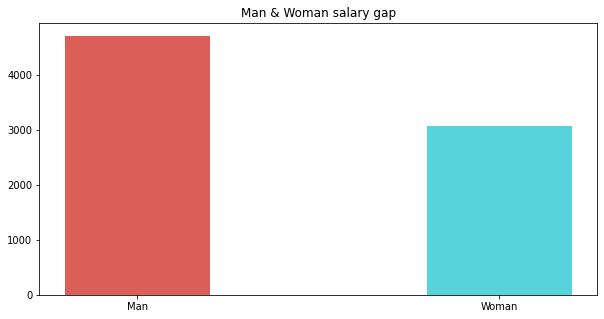

In [168]:
x = np.arange(2)
gender = ['Man', 'Woman']
values = [average_man_salary, average_woman_salary]
colors = sns.color_palette('hls', len(gender))

plt.figure(figsize=(10, 5))
plt.title('Man & Woman salary gap')
plt.bar(x, values, width = 0.4, color=colors)
plt.xticks(x, gender)
plt.show()

##### 남자 6681040명, 여자 4165419명의 데이터를 분석한 결과 모든 남자의 평균 월급은 4710800원이며 모든 여자의 평균 월급은 3069500원 입니다.

##### 직종, 노동시간, 연령등을 고려하지 않은 결과 남자의 평균 월급은 여자의 평균 월급보다 높음. 

### 1) 직종별 남녀 평균 임금

In [132]:
jobs = ['Administrator', 'Practitioner', 'Office Worker', 'Service Worker', 'Sales Worker', 'Agriculture, forestry and fishing', 'Technical Worker', 'Mechanical Worker', 'Elementary Workers']
man_salary = []
woman_salary = []

for job in jobs:
    man_salary_data = salary_data[(salary_data['salary'] != 'all') & (salary_data['gender'] == 'man') & (salary_data['jobs'] == job) & (salary_data['age'] == 'all')]
    man_salary_df = man_salary_data['salary'].mul(man_salary_data['number of workers'])
    job_workers =  salary_data[(salary_data['salary'] == 'all') & (salary_data['gender'] == 'man') & (salary_data['jobs'] == job) & (salary_data['age'] == 'all')]['number of workers']
    man_salary_sum = 0
    for salary in man_salary_df:
        man_salary_sum += salary
    man_salary_average = man_salary_sum // job_workers
    man_salary.append(man_salary_average.values[0])
    
    woman_salary_data = salary_data[(salary_data['salary'] != 'all') & (salary_data['gender'] == 'woman') & (salary_data['jobs'] == job) & (salary_data['age'] == 'all')]
    woman_salary_df = woman_salary_data['salary'].mul(woman_salary_data['number of workers'])
    job_workers =  salary_data[(salary_data['salary'] == 'all') & (salary_data['gender'] == 'woman') & (salary_data['jobs'] == job) & (salary_data['age'] == 'all')]['number of workers']
    woman_salary_sum = 0
    for salary in woman_salary_df:
        woman_salary_sum += salary
    woman_salary_average = woman_salary_sum // job_workers
    woman_salary.append(woman_salary_average.values[0])

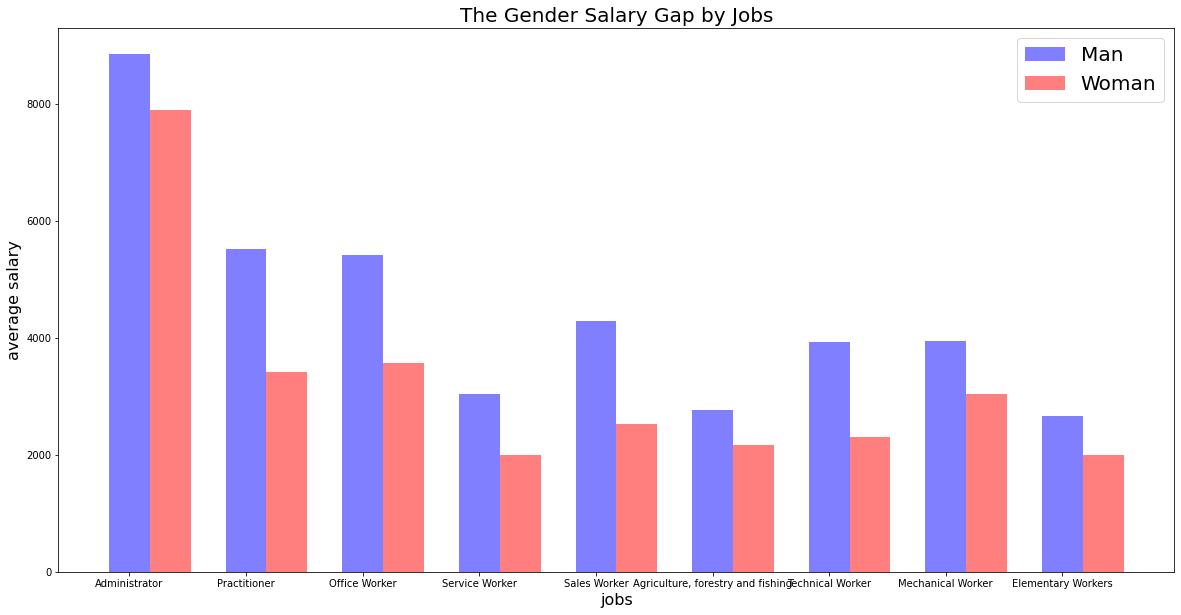

In [134]:
bar_width = 0.35
alpha = 0.5
index = np.arange(9)
plt.figure(figsize=(20, 10))

p1 = plt.bar(index, man_salary,
             bar_width,
             color='blue',
             alpha=alpha,
             label="Man")

p2 = plt.bar(index + bar_width, woman_salary,
             bar_width,
             color='red',
             alpha=alpha,
             label='Woman')

plt.title('The Gender Salary Gap by Jobs', fontsize=20)
plt.ylabel('average salary', fontsize=16)
plt.xlabel('jobs', fontsize=16)
plt.xticks(index, jobs, fontsize=10)
plt.legend((p1[0], p2[0]), ('Man', 'Woman'), fontsize=20, loc='upper right')
plt.show()

#### 직종 별로 남녀의 평균임금을 계산한 결과 남자의 평균 월급이 여자의 평균 월급 보다 높은 것을 알 수 있음.

### 2) 연령 별 남녀 평균 임금

In [135]:
ages = ['~ 19', '20 ~ 24', '25 ~ 29', '30 ~ 34', '35 ~ 39', '40 ~ 44', '45 ~ 49', '50 ~ 54', '55 ~ 59', '60 ~']
man_salary = []
woman_salary = []
for age in ages:
    man_salary_data = salary_data[(salary_data['salary'] != 'all') & (salary_data['jobs'] == 'all') & (salary_data['gender'] == 'man') & (salary_data['age'] == age)]
    man_salary_df = man_salary_data['salary'].mul(man_salary_data['number of workers'])
    age_workers =  salary_data[(salary_data['salary'] == 'all') & (salary_data['jobs'] == 'all') & (salary_data['gender'] == 'man') & (salary_data['age'] == age)]['number of workers']
    man_salary_sum = 0
    for salary in man_salary_df:
        man_salary_sum += salary
    man_salary_average = man_salary_sum // age_workers
    man_salary.append(man_salary_average.values[0])
    
    woman_salary_data = salary_data[(salary_data['salary'] != 'all') & (salary_data['jobs'] == 'all') & (salary_data['gender'] == 'woman') & (salary_data['age'] == age)]
    woman_salary_df = woman_salary_data['salary'].mul(woman_salary_data['number of workers'])
    age_workers =  salary_data[(salary_data['salary'] == 'all') & (salary_data['jobs'] == 'all') & (salary_data['gender'] == 'woman') & (salary_data['age'] == age)]['number of workers']
    woman_salary_sum = 0
    for salary in woman_salary_df:
        woman_salary_sum += salary
    woman_salary_average = woman_salary_sum // age_workers
    woman_salary.append(woman_salary_average.values[0])

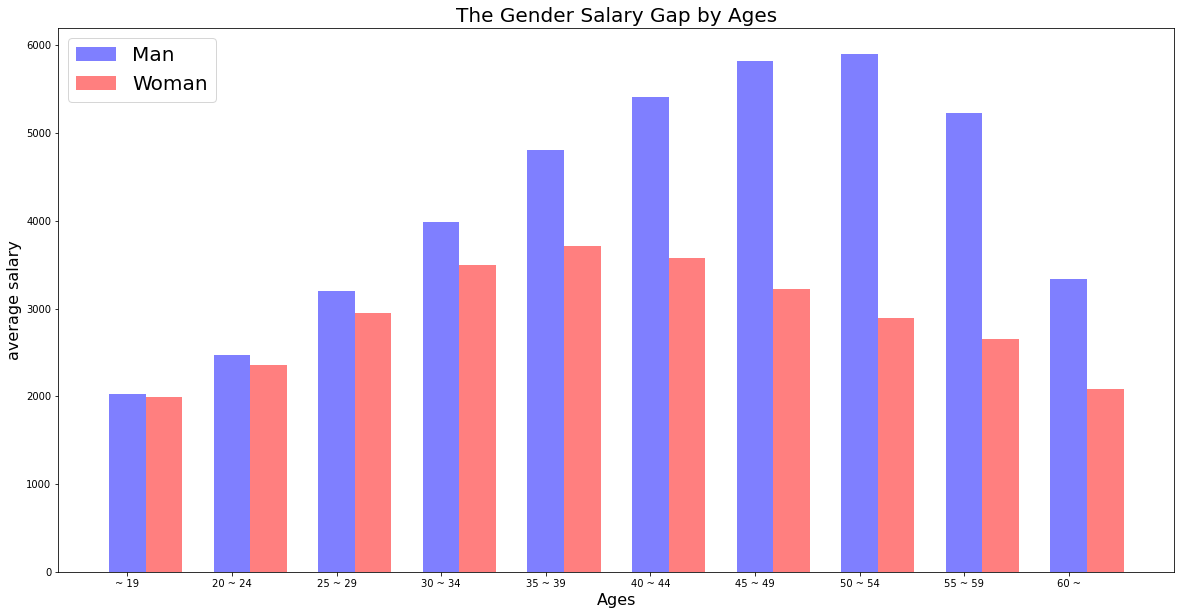

In [136]:
bar_width = 0.35
alpha = 0.5
index = np.arange(10)
plt.figure(figsize=(20, 10))

p1 = plt.bar(index, man_salary,
             bar_width,
             color='blue',
             alpha=alpha,
             label="Man")

p2 = plt.bar(index + bar_width, woman_salary,
             bar_width,
             color='red',
             alpha=alpha,
             label='Woman')

plt.title('The Gender Salary Gap by Ages', fontsize=20)
plt.ylabel('average salary', fontsize=16)
plt.xlabel('Ages', fontsize=16)
plt.xticks(index, ages, fontsize=10)
plt.legend((p1[0], p2[0]), ('Man', 'Woman'), fontsize=20, loc='upper left')
plt.show()

#### 연령 별로 남녀의 평균임금을 계산한 결과 남자의 평균 월급이 모든 연령대에서 여자에 비해 높은 것으로 확인됨.

### 3) 남녀 노동시간당 임금 차이

In [163]:


man_salary_data = salary_data[(salary_data['jobs'] == 'all') & (salary_data['gender'] == 'man') & (salary_data['age'] == 'all') & (salary_data['salary'] != 'all')]

woman_salary_data = salary_data[(salary_data['jobs'] == 'all') & (salary_data['gender'] == 'woman') & (salary_data['age'] == 'all') & (salary_data['salary'] != 'all')]

man_hourly_sum = 0
data_len = len(man_salary_data)
for i in range(data_len):
    man_hourly_sum += man_salary_data.iloc[i]['salary']  // man_salary_data.iloc[i]['working hours']
man_hourly_salary = man_hourly_sum // data_len
print(man_hourly_salary)

woman_hourly_sum = 0
for i in range(data_len):
    woman_hourly_sum += woman_salary_data.iloc[i]['salary'] // woman_salary_data.iloc[i]['working hours']
woman_hourly_salary = woman_hourly_sum // data_len

16.0
17.0


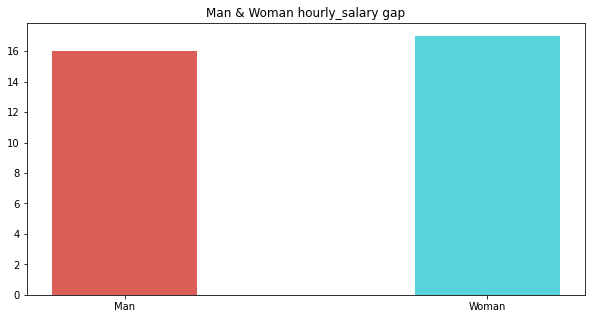

In [169]:
x = np.arange(2)
gender = ['Man', 'Woman']
values = [man_hourly_salary, woman_hourly_salary]
colors = sns.color_palette('hls', len(gender))

plt.figure(figsize=(10, 5))
plt.title('Man & Woman hourly_salary gap')
plt.bar(x, values, width = 0.4, color=colors)
plt.xticks(x, gender)
plt.show()

#### 시간 당 임금을 확인해봤을때 남자의 시급이 여자의 시급보다 낮은 것을 확인할 수 있었음.

#### 전체적으로 남자의 평균임금이 여자의 평균임금보다 큰 차이로 높은 것을 알 수 있지만 위 분석을 통해 여러 가설을 세울수 있다.

- **여성의 시간당 임금이 남성의 시간당 임금보다 높은 것을 볼때 노동시간과 각 요소들을 조합해 보면 생각보다 낮아질수 있다고 생각함**
- **남성의 경우 50대 초반까지 임금이 꾸준히 상승하지만 여성의 경우 40세부터 임금이 감소되는 현상을 볼수 있다**
- **남성과 여성의 평균임금이 점차 차이나는 현상을 볼때 여성은 결혼을 하고 아이를 낳으며 생기는 경력단절의 영향이 있다고 생각됨**